In [9]:
!pip install --user tensorflow

In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from  tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
ad = pd.read_parquet('cic-collection.parquet')

In [4]:
ad.head(10)

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,ClassLabel
0,4,2,0,12.0,0.0,6.0,6.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
1,1,2,0,12.0,0.0,6.0,6.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
2,3,2,0,12.0,0.0,6.0,6.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
3,1,2,0,12.0,0.0,6.0,6.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
4,609,7,4,484.0,414.0,233.0,69.142860,111.967896,207.0,103.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
5,879,9,4,656.0,3064.0,313.0,72.888885,136.153809,1532.0,766.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
6,1160,9,6,3134.0,3048.0,1552.0,348.222229,682.482544,1518.0,508.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
7,524,7,4,2812.0,2820.0,1397.0,401.714294,679.914856,1410.0,705.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
8,6,1,1,6.0,6.0,6.0,6.000000,0.000000,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
9,1119,9,6,3160.0,3060.0,1565.0,351.111115,688.214966,1524.0,510.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [6]:
print(ad['ClassLabel'].value_counts())

Benign          7186189
DDoS            1234729
DoS              397344
Botnet           145968
Bruteforce       103244
Infiltration      94857
Webattack          2995
Portscan           2255
Name: ClassLabel, dtype: int64


In [18]:
#ad.info()

In [8]:
label_col = "ClassLabel"

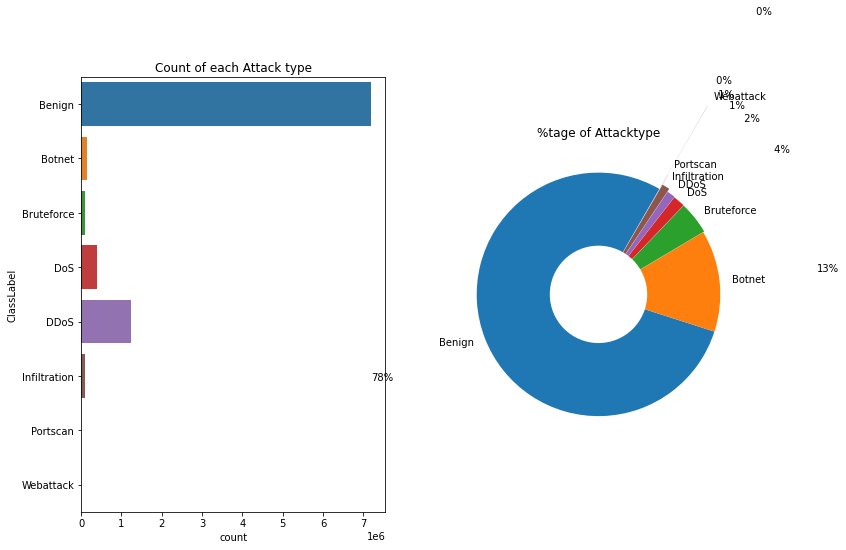

In [9]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(ad[label_col].dropna().value_counts()))/sum(list(ad[label_col].dropna().value_counts())))[::-1])[:]
labels = list(ad[label_col].dropna().unique())[:]
sizes = ad[label_col].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%2.0f%%', pctdistance=1.9)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y=label_col, data=ad, ax=ax1)
ax1.set_title("Count of each Attack type")
ax2.set_title("%tage of Attacktype")
plt.show()

In [10]:
X = ad.drop([label_col, 'Label'], axis=1)
y = ad[label_col]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

del X
del y

In [12]:
label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [13]:
label_encoder.classes_

array(['Benign', 'Botnet', 'Bruteforce', 'DDoS', 'DoS', 'Infiltration',
       'Portscan', 'Webattack'], dtype=object)

In [14]:
min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [15]:
num_classes = len(np.unique(y_train))
num_classes

8

In [16]:


y_train = to_categorical(y_train,num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [17]:
print(y_train.shape, y_test.shape)

(7334064, 8) (1833517, 8)


In [20]:
X_train.shape[1]

57

In [22]:
y_train.shape[1]

8

In [28]:
input_shape = X_train.shape[1:]

In [29]:
print(X_train.shape, X_test.shape)
print(input_shape)

(7334064, 57) (1833517, 57)
(57,)


In [35]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(57,)))

# Added a second dense layer with 32 units and ReLU activation function
model.add(Dense(32, activation='relu'))

# Output layer with 8 units (one for each class) and softmax activation function
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,  
                    batch_size=32,  
                    validation_split=0.2)  # Used 20% of training data for validation

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on test data
y_pred = model.predict(X_test)
print("Predictions:\n", y_pred)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │           3,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,056 (23.66 KB)

 Trainable params: 6,056 (23.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
183352/183352 ━━━━━━━━━━━━━━━━━━━━ 201s 1ms/step - accuracy: 0.9300 - loss: 0.2436 - val_accuracy: 0.9587 - val_loss: 0.1395
Epoch 2/10
183352/183352 ━━━━━━━━━━━━━━━━━━━━ 196s 1ms/step - accuracy: 0.9595 - loss: 0.1319 - val_accuracy: 0.9606 - val_loss: 0.1222
Epoch 3/10
183352/183352 ━━━━━━━━━━━━━━━━━━━━ 194s 1ms/step - accuracy: 0.9628 - loss: 0.1182 - val_accuracy: 0.9741 - val_loss: 0.1023
Epoch 4/10
183352/183352 ━━━━━━━━━━━━━━━━━━━━ 189s 1ms/step - accuracy: 0.9701 - loss: 0.1050 - val_accuracy: 0.9776 - val_loss: 0.0887
Epoch 5/10
183352/183352 ━━━━━━━━━━━━━━━━━━━━ 189s 1ms/step - accuracy: 0.9727 - loss: 0.0994 - val_accuracy: 0.9752 - val_loss: 0.1034
Epoch 6/10
183352/183352 ━━━━━━━━━━━━━━━━━━━━ 190s 1ms/step - accuracy: 0.9735 - loss: 0.0976 - val_accuracy: 0.9793 - val_loss: 0.0852
Epoch 7/10
183352/183352 ━━━━━━━━━━━━━━━━━━━━ 188s 1ms/step - accuracy: 0.9748 - loss: 0.0944 - val_accuracy: 0.9805 - val_loss: 0.0810
Epoch 8/10
183352/183352 ━━━━━━━━━━━━━━━━━━━━ 18

SyntaxError: invalid syntax (Temp/ipykernel_11420/842601383.py, line 7)